In [230]:
import finesse
finesse.configure(plotting=True)
sm=finesse.Model()
sm.parse("""
l laser P=1 

s s1 laser.p1 md1.p1 L=0
mod md1 midx=1 order=1 f=0.15e8

s s2 md1.p2 pr.p1 L=1
m pr R=0.9 T=0.1            
s PRC pr.p2 bs1.p1 L=1
bs bs1 R=0.5 T=0.5  

s Lx bs1.p3 ETMx.p1 L=1  
m ETMx R=1 T=0 phi=90                  #setting the asymmetric port dark.

s Ly bs1.p2 ETMy.p1 L=1
m ETMy R=1 T=0 
 
pd1 PDH pr.p2.o f=md1.f phase=0
xaxis(pr.phi,lin,-0.5,0.5,10000)        #Tuning the Power_recycling mirror from -lambda/2 to lambda/2
""")

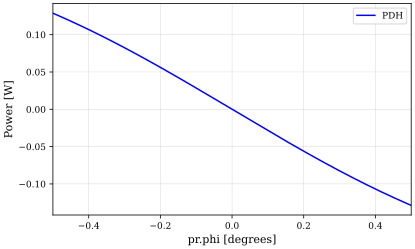

-0.02195932476925638


In [231]:
out=sm.run()
out.plot()
Error=[]
l_p=np.linspace(-0.5,0.5,1001)
for i in range(1001):
        Error.append(out["PDH"][i])
import numpy as np
slope=np.polyfit(phi,Error,1)
print(slope[0])